#**Iman Noor**

**Email: imannoor2002@gmail.com**


# **Titanic Survival Prediction**

##**1. Introduction**
This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin and whether or not they survived.

## **2. Problem Definition**
In a statement, can we predict whether the titanic passengers survived or not?

##**3. Features**
- **Survived:** Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name:** Name of passenger
- **Sex:** Sex of the passenger
- **Age:** Age of the passenger (Some entries contain NaN)
- **SibSp:** Number of siblings and spouses of the passenger aboard
- **Parch:** Number of parents and children of the passenger aboard
- **Ticket:** Ticket number of the passenger
- **Fare:** Fare paid by the passenger
- **Cabin:** Cabin number of the passenger (Some entries contain NaN)
- **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

##**Preparing the tools**

In [ ]:
# Importing all the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function so that the plots appear inside notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## **Load Data**

In [ ]:
# Load data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tested.csv')
df.shape

(418, 12)

## **Data Exploration**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Finding how many of each class there
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

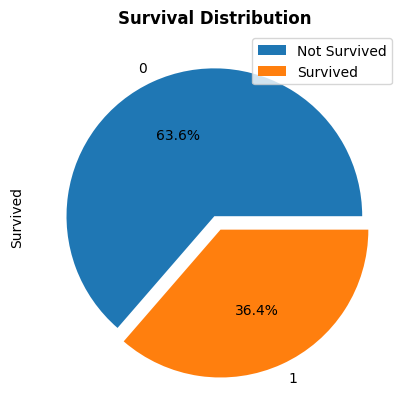

In [ ]:
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.1])
plt.legend(['Not Survived', 'Survived'])
plt.title('Survival Distribution', weight='bold')
plt.show();

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Checking missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Filling age and fare columns
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean()).astype(int)

In [ ]:
# Converting 'Sex' and 'Embarked' column into binary
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'Q':0,'S':1,'C':2})

In [ ]:
def preprocess(df):
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      df[label]=content.astype('category').cat.as_ordered()
      df[label]=pd.Categorical(content).codes+1
  return df

In [ ]:
df=preprocess(df)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Name           int16
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Ticket         int16
Fare           int64
Cabin           int8
Embarked       int64
dtype: object

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,207,0,34,0,0,153,7,0,0
1,893,1,3,404,1,47,1,0,222,7,0,1
2,894,0,2,270,0,62,0,0,74,9,0,0
3,895,0,3,409,0,27,0,0,148,8,0,1
4,896,1,3,179,1,22,1,1,139,12,0,1


## **Data Visualization**

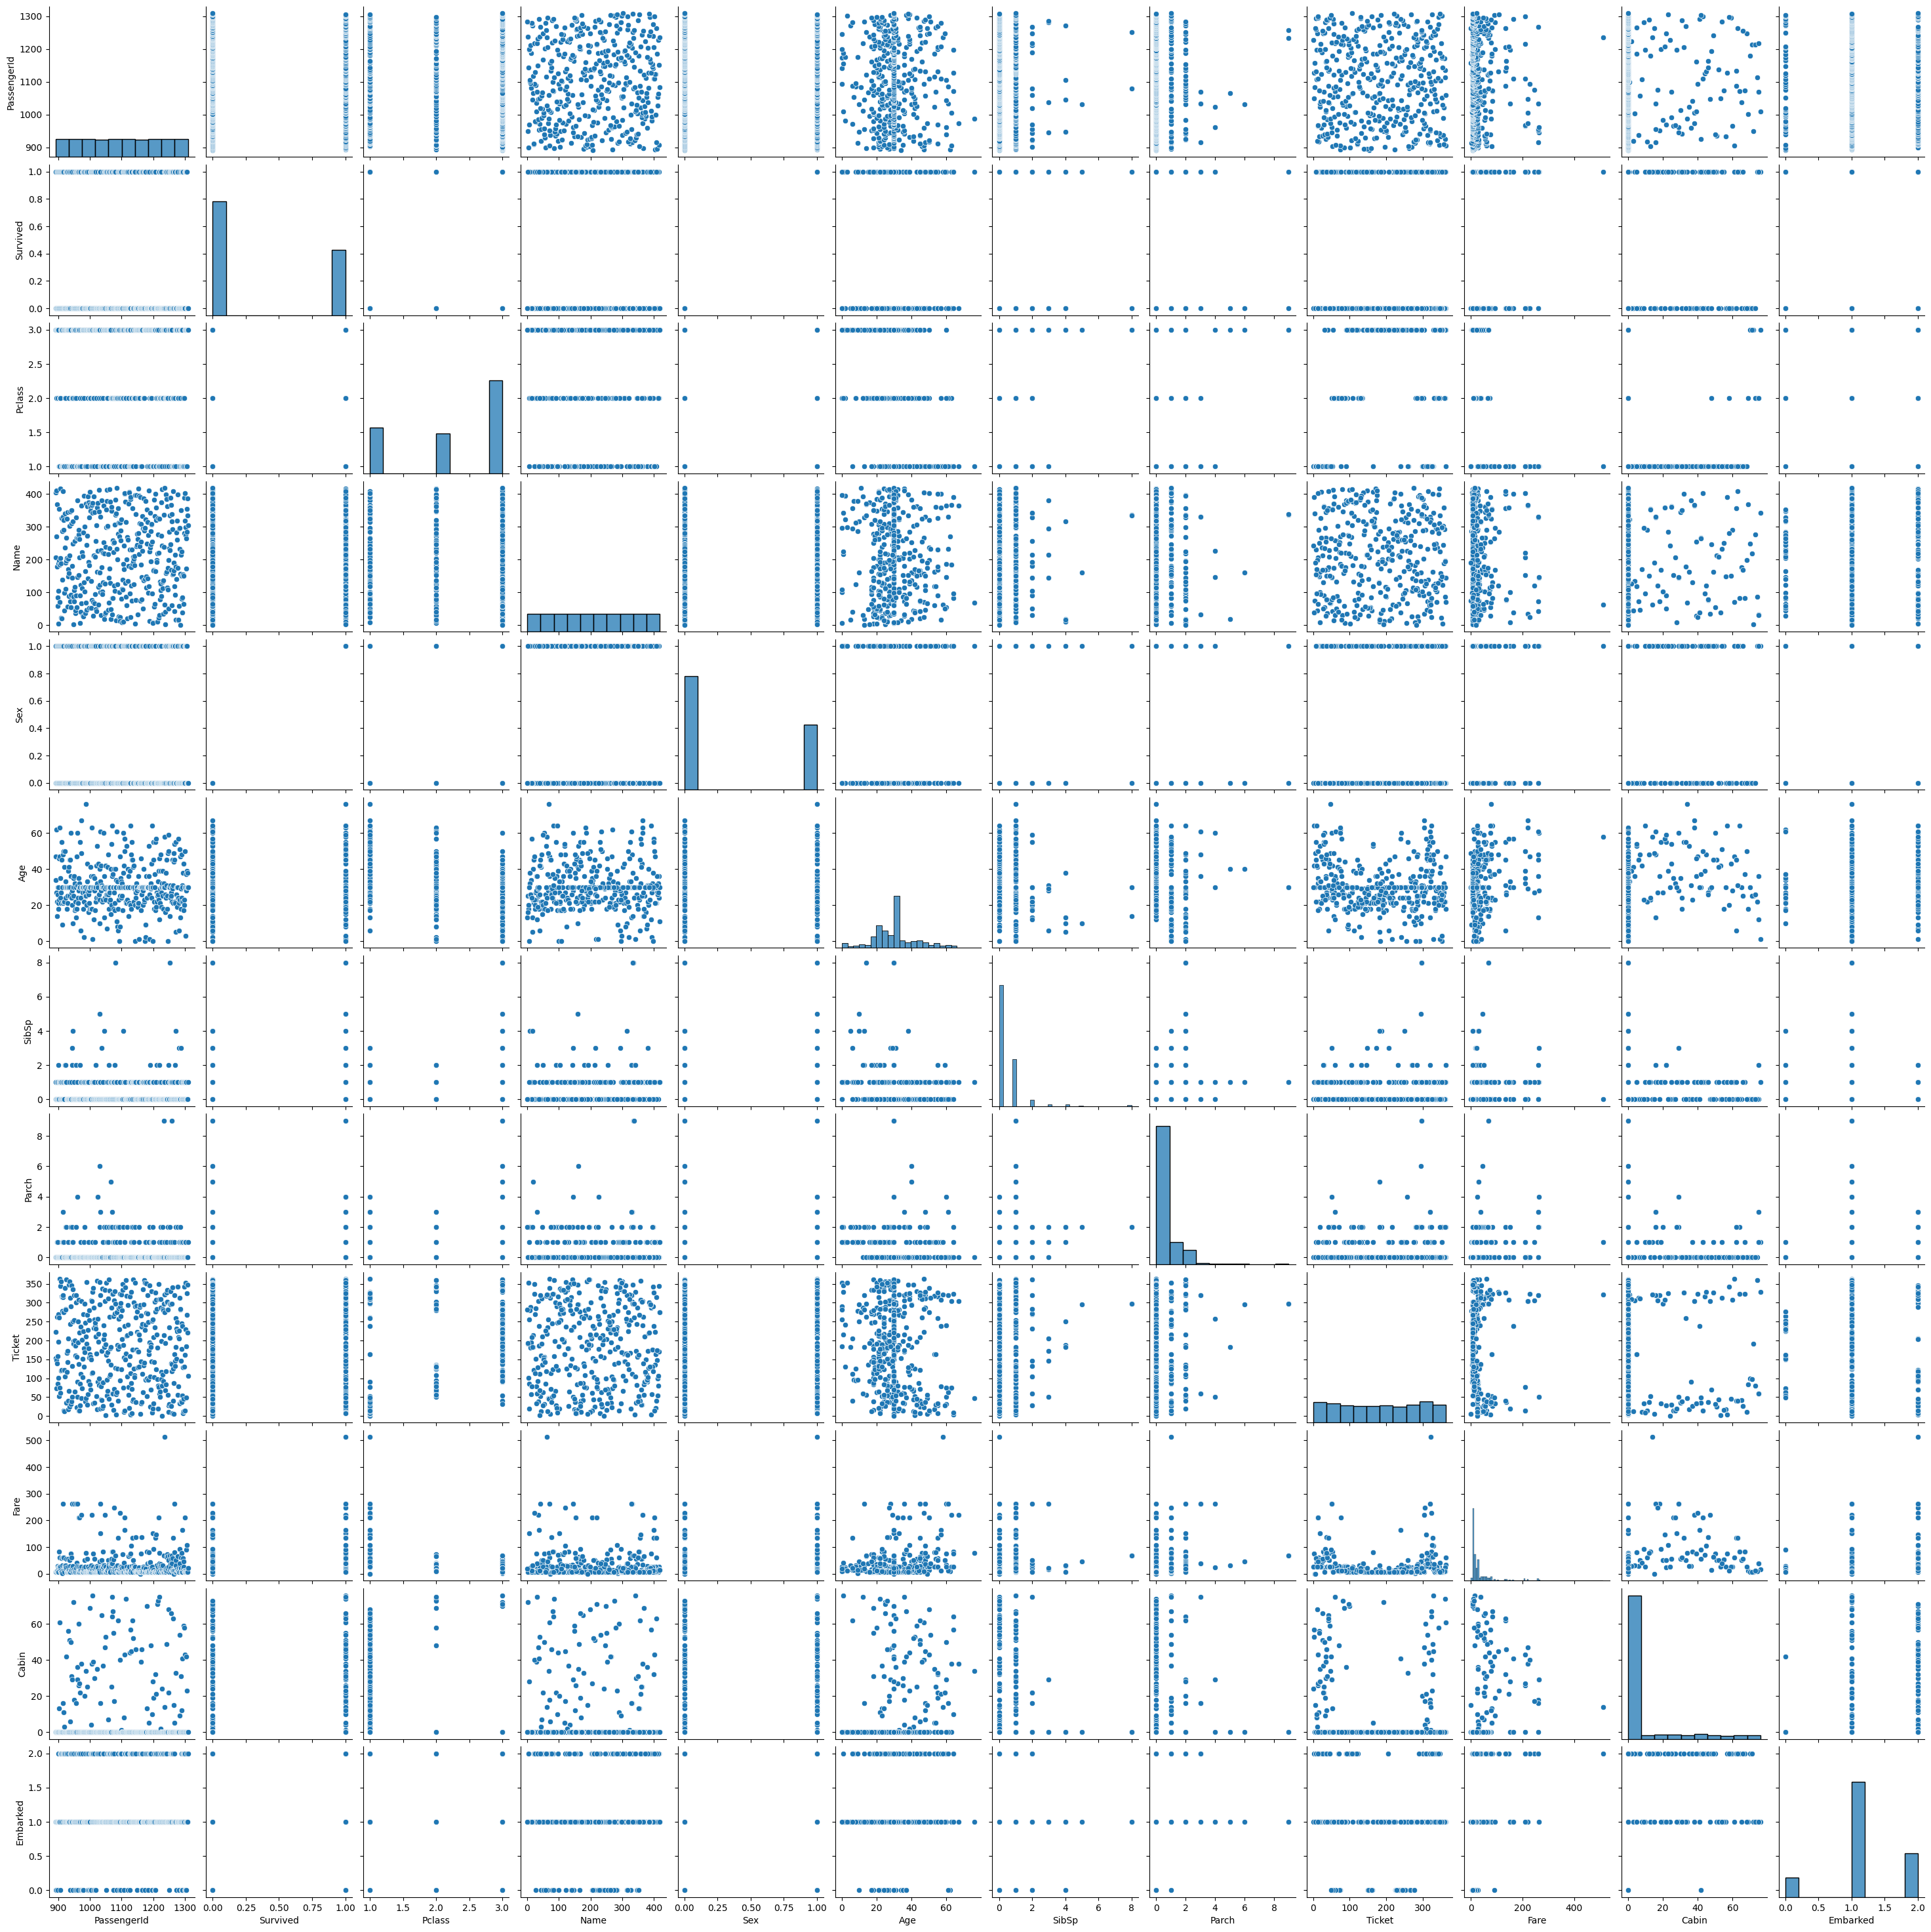

In [ ]:
sns.pairplot(df);

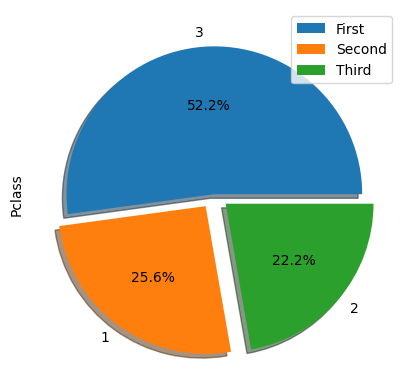

In [ ]:
df['Pclass'].value_counts().plot.pie(shadow=True, autopct='%1.1f%%',explode=[0, 0.1, 0.1])
plt.legend(['First', 'Second', 'Third'])
plt.show();

<Axes: >

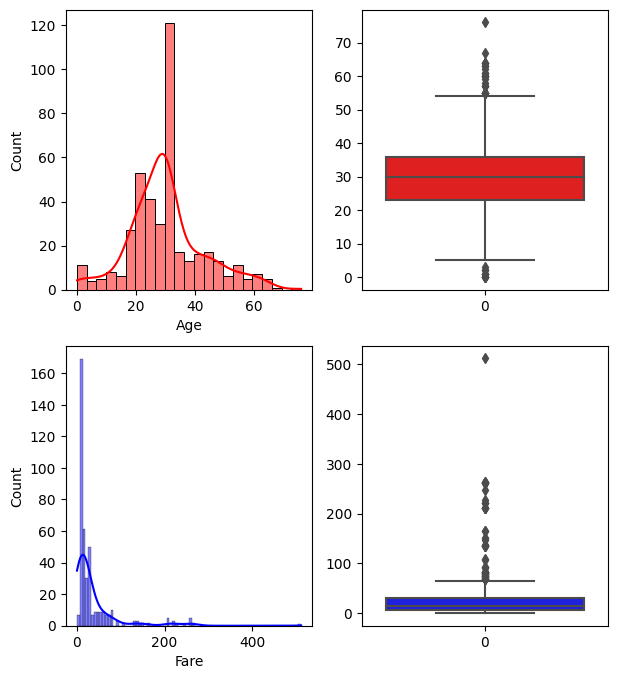

In [ ]:
plt.figure(figsize=(7, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], color='r',kde=True)
plt.subplot(2, 2, 2)
sns.boxplot(df['Age'], color='r')
plt.subplot(2, 2, 3)
sns.histplot(df['Fare'], color='Blue',kde=True)
plt.subplot(2, 2, 4)
sns.boxplot(df['Fare'], color='Blue')

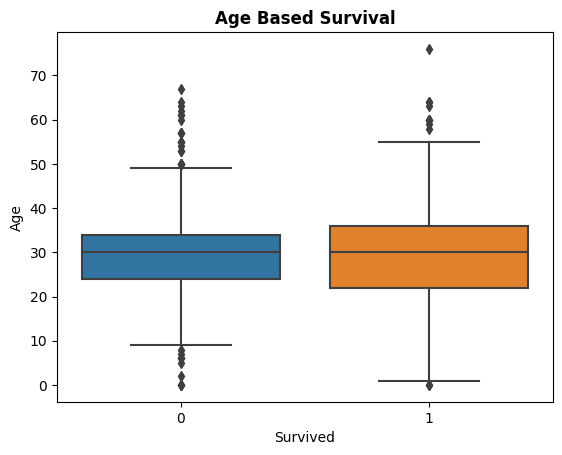

In [ ]:
sns.boxplot(x=df['Survived'], y=df['Age'])
plt.title('Age Based Survival', weight='bold');

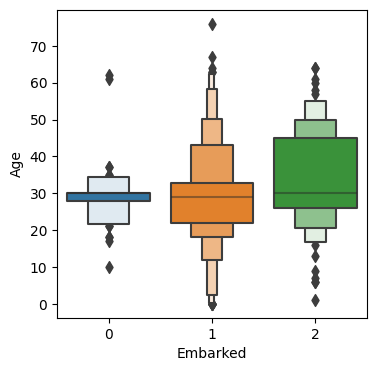

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))

sns.boxenplot(y="Age", x="Embarked", data=df)
plt.show()

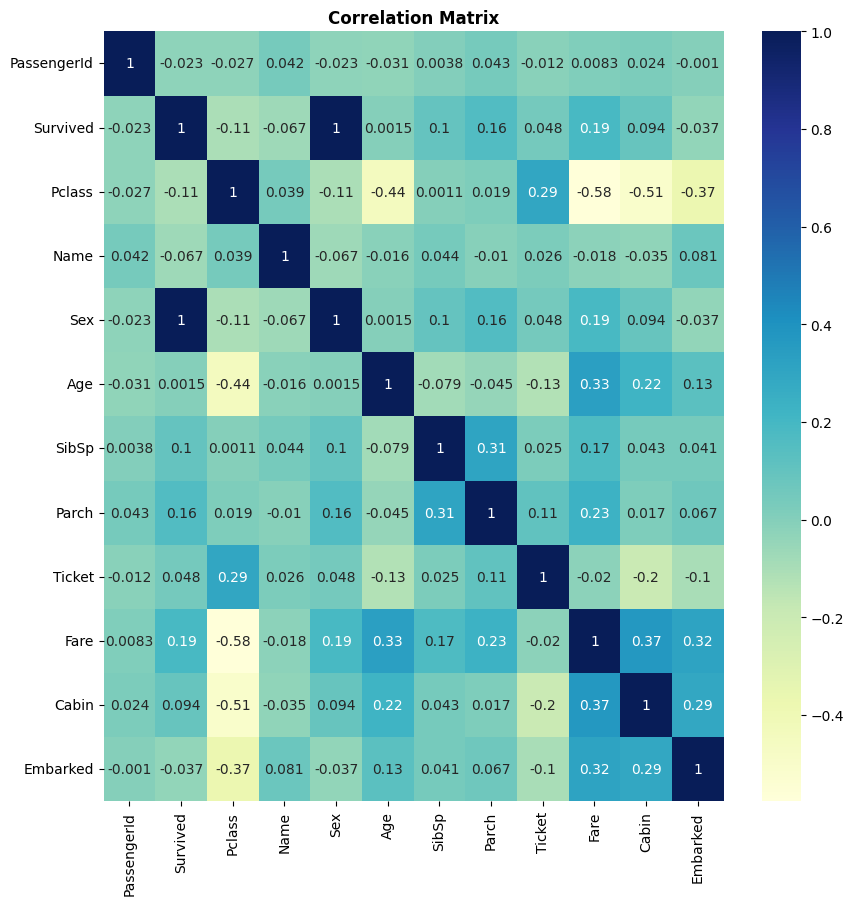

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
plt.title('Correlation Matrix', weight='bold')
df_corr_matrix = df.corr()
sns.heatmap(df_corr_matrix, cmap='YlGnBu', annot=True);

## **Modelling**

Modelling is done using:
- `Random Forest Classifier`
- `Logistic Regression`

In [ ]:
# Set random seed
np.random.seed(42)

# Split data into X and y
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,207,0,34,0,0,153,7,0,0
1,893,3,404,1,47,1,0,222,7,0,1
2,894,2,270,0,62,0,0,74,9,0,0
3,895,3,409,0,27,0,0,148,8,0,1
4,896,3,179,1,22,1,1,139,12,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,0,30,0,0,268,8,0,1
414,1306,1,284,1,39,0,0,325,108,23,2
415,1307,3,333,0,38,0,0,347,7,0,1
416,1308,3,385,0,30,0,0,221,8,0,1


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
336,1228,2,414,0,32,0,0,80,13,0,1
31,923,2,191,0,24,2,0,284,31,0,1
84,976,2,222,0,30,0,0,73,10,0,0
287,1179,1,352,0,24,1,0,53,82,13,1
317,1209,2,320,0,19,0,0,123,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,963,3,264,0,21,0,0,195,7,0,1
106,998,3,53,0,21,0,0,154,7,0,0
270,1162,1,253,0,46,0,0,34,75,39,2
348,1240,2,158,0,24,0,0,83,13,0,1


In [ ]:
y_train, len(y_train)

(336    0
 31     0
 84     0
 287    0
 317    0
       ..
 71     0
 106    0
 270    0
 348    0
 102    0
 Name: Survived, Length: 334, dtype: int64,
 334)

In [ ]:
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

# Function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test,
                             y_train=y_train, y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9880952380952381, 'Random Forest': 1.0}


##**Model Comparison**

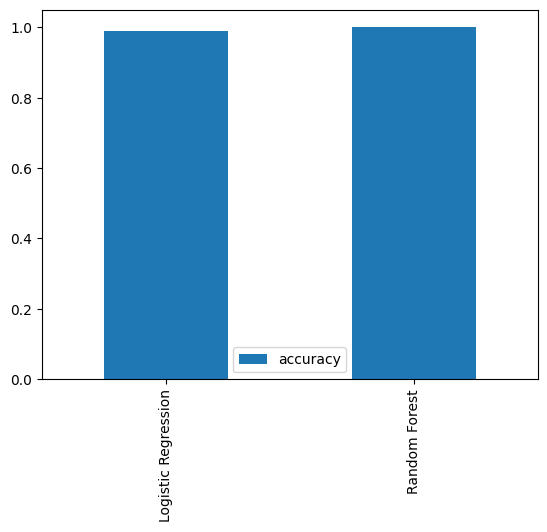

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

##**Hyperparameter Tuning with GridSearchCV**

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid = {'C': np.logspace(-4,4,30),
        'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

1.0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred, y_test

(array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]),
 321    0
 324    1
 388    0
 56     0
 153    1
       ..
 57     0
 126    0
 24     1
 17     0
 66     1
 Name: Survived, Length: 84, dtype: int64)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]
1.0


In [ ]:
df.to_csv('Titanic_Submission.csv', index=False)

##**Conclusion**

In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy: {:.2f}%'.format(acc*100))

Logistic Regression Accuracy: 100.00%
